In [2]:
#source of fit function: https://pubs.aip.org/aip/jap/article/127/16/165705/153449
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import constants as c

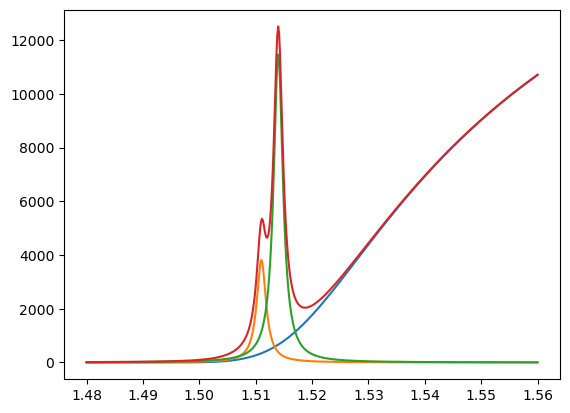

In [111]:
x = np.linspace(1.48,1.56,500)
def elliot(x,Eb,Eg,A):
    return A*np.pi*np.sqrt(Eb)*np.heaviside(x-Eg,0)/(1-np.exp((-np.pi*2*np.sqrt(Eb/(x-Eg)))))
def Urbach(x,sigma,E0,alpha0):
    return np.heaviside(E0-x,0)*alpha0*np.exp(-sigma*(E0-x))
import numpy as np 
def Peak(x,A,Eg,Eb,w):
    return (2*A/np.pi)*(w/(4*(x-Eg+Eb)**2 + w**2))   
def Continuum(x,A,Eu,Eg,Em,pg):
    p= pg+(x-Eg)/Em
    return A*(np.log2(1+np.exp((x-Eg)/p/Eu)))
def Johnson(x,A,B,C,Eu,Em,pg,Eg,Ebl,Ebh,wl,wh):
    xa =np.asarray(x)
    ya = Continuum(xa,A,Eu,Eg,Em,pg)+Peak(xa,B,Eg,Ebh,wh)+Peak(xa,C,Eg,Ebl,wl)
    return list(ya)
fig,ax = plt.subplots()
#ax.plot(x,Urbach(x,10,1.5,1200))
#ax.plot(x,elliot(x,.010,1.521,12000))
A = 2000
B = 12
C = 36
Eu = .2
Em =1.7
pg =.03
Eg = 1.521
Ebh = .01
Ebl = .007
wh = .0020
wl = .0020

ax.plot(x,Continuum(x,A,Eu,Eg,Em,pg))
ax.plot(x,Peak(x,B,Eg,Ebh,wh))
ax.plot(x,Peak(x,C,Eg,Ebl,wl))

ax.plot(x,Johnson(x,A,B,C,Eu,Em,pg,Eg,Ebl,Ebh,wl,wh))
ax.set_yscale('linear')

In [112]:
1/.01275

78.43137254901961

C:\Users\mattl\AppData\Local\Temp\ipykernel_24116\2185898879.py:16: RuntimeWarning: invalid value encountered in sqrt
  y=A*np.heaviside(x-Eg,0)/(1-np.exp((-np.pi*2*np.sqrt(Eb/(x-Eg)))))


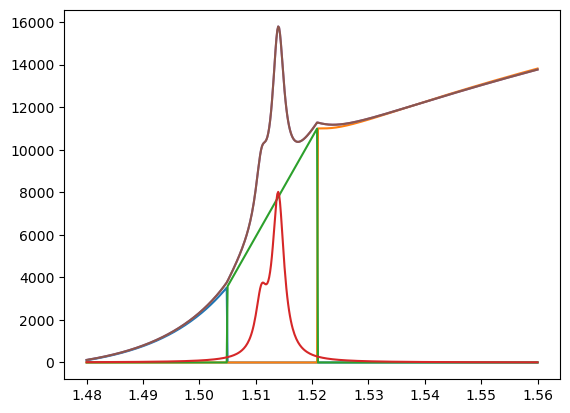

In [187]:
x = np.linspace(1.48,1.56,500)
Eg = 1.521
Ebh = .01
Ebl = .007
wh = .0025
wl = .0025
sigma = 80
E0=1.505
Eb = .00255
y0 = -436.31
A=4e3 
B= 1.1e4
C = 10
D = 30
def elliot(x,Eb,Eg,A):
    y=A*np.heaviside(x-Eg,0)/(1-np.exp((-np.pi*2*np.sqrt(Eb/(x-Eg)))))
    y[np.isnan(y)]=0
    return y
def Urbach(x,sigma,E0,alpha0,y0):
    y=np.heaviside(E0-x,0)*(alpha0*np.exp(-sigma*(E0-x))+y0)
    y[np.isnan(y)]=0
    return y 
def naiveline(x,m,b,Es,Ee):
    return np.heaviside(x-Es,0)*np.heaviside(Ee-x,0)*(m*x+b)
def Peak(x,A,Eg,Eb,w):
    return (2*A/np.pi)*(w/(4*(x-Eg+Eb)**2 + w**2))  
def Peaks(x,A,B,Eg,Eba,Ebb,wa,wb):
    return Peak(x,A,Eg,Eba,wa)+Peak(x,B,Eg,Ebb,wb) 
def FullElliot(x,A,B,C,D,sigma,E0,y0,Eb,Eg,Ebl,Ebh,wh,wl):
    xa = np.asarray(x)
    m = (elliot(np.asarray([Eg+.0001]),Eb,Eg,B)-Urbach(np.asarray([E0-.0001]),sigma,E0,A,y0))/(Eg-E0)
    b = -m*(E0-.0001)+Urbach(np.asarray([E0-.0001]),sigma,E0,A,y0)
    ya= Urbach(xa,sigma,E0,A,y0)+naiveline(xa,m,b,E0,Eg)+elliot(xa,Eb,Eg,B)+Peaks(xa,C,D,Eg,Ebh,Ebl,wh,wl)
    return list(ya)
fig, ax = plt.subplots()
ax.plot(x,Urbach(x,80,1.505,4e3,-436),label='Urbach')
ax.plot(x,elliot(x,.0025,1.521,1.1e4),label='Elliot')

m = (elliot(np.asarray([Eg+.0001]),Eb,Eg,B)-Urbach(np.asarray([E0-.0001]),sigma,E0,A,y0))/(Eg-E0)
b = -m*(E0-.0001)+Urbach(np.asarray([E0-.0001]),sigma,E0,A,y0)
    
ax.plot(x,naiveline(x,m,b,E0,Eg),label='Naive Line')
ax.plot(x,Peaks(x,C,D,Eg,Ebh,Ebl,wh,wl))
ax.plot(x,naiveline(x,m,b,E0,Eg)+Peaks(x,C,D,Eg,Ebh,Ebl,wh,wl)+elliot(x,Eb,Eg,B)+Urbach(x,sigma,E0,A,y0))
ax.plot(x,FullElliot(x,A,B,C,D,sigma,E0,y0,Eb,Eg,Ebl,Ebh,wh,wl))
#ax.set_yscale('log')

In [30]:
from scipy import constants as c 
dE = .0015
dw = dE*c.e/c.h
T2 =1/dw
print(T2)

2.7571117979492395e-12


In [12]:
(1/820.5-1/820)*c.h*c.c

-1.4762309248887078e-31

In [19]:
1.515/2600

0.0005826923076923076

$$
FullElliot(x)= A\Theta[x-E0]e^{-\sigma(x-E0)}+\Theta[E0-x]\Theta[x-Eg](mx+b)\\
+B\Theta[Eg-x]\frac{1}{1-e^{-2\pi\sqrt{\frac{Eb}{x-Eg}}}}\\
+\frac{2C}{\pi}\frac{wl}{4(x-Eg+Ebh)^2 + wh^2} + \frac{2D}{\pi}\frac{wl}{(4(x-Eg+Ebh)^2 + wl^2))}
$$

C:\Users\mattl\AppData\Local\Temp\ipykernel_18856\2810186305.py:21: RuntimeWarning: invalid value encountered in sqrt
  y=A*np.heaviside(x-Eg,0)/(1-np.exp((-np.pi*2*np.sqrt(Eb/(x-Eg)))))


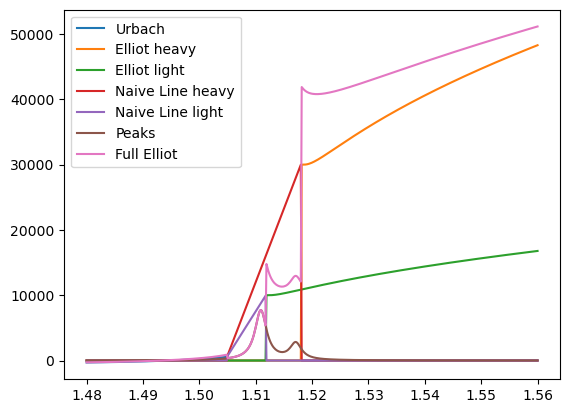

In [4]:
import numpy as np  
import matplotlib.pyplot as plt 

x = np.linspace(1.48,1.56,500)
Egh = 1.5181
Egl = 1.5119
Ebh = .001
Ebl = .001
wh = .0025
wl = .0025
sigma = 80
E0=1.505
Eb = .00255
y0 = -436.31
A=1e3 
B=3e4
C= 1e4
D = 10
E = 30
def elliot(x,Eb,Eg,A):
    y=A*np.heaviside(x-Eg,0)/(1-np.exp((-np.pi*2*np.sqrt(Eb/(x-Eg)))))
    y[np.isnan(y)]=0
    return y
def Urbach(x,sigma,E0,alpha0,y0):
    y=np.heaviside(E0-x,0)*(alpha0*np.exp(-sigma*(E0-x))+y0)
    y[np.isnan(y)]=0
    return y 
def naiveline(x,m,b,Es,Ee):
    return np.heaviside(x-Es,0)*np.heaviside(Ee-x,0)*(m*x+b)
def Peak(x,A,Eg,Eb,w):
    return (2*A/np.pi)*(w/(4*(x-Eg+Eb)**2 + w**2))  
def Peaks(x,A,B,Ega,Egb,Eba,Ebb,wa,wb):
    return Peak(x,A,Ega,Eba,wa)+Peak(x,B,Egb,Ebb,wb) 
def FullElliot(x,A,B,C,D,E,sigma,E0,y0,Eb,Egl,Egh,Ebl,Ebh,wh,wl):
    xa = np.asarray(x)
    mh = (elliot(np.asarray([Egh+.0001]),Eb,Egh,B)-Urbach(np.asarray([E0-.0001]),sigma,E0,A,y0))/(Egh-E0)
    bh = -mh*(E0-.0001)+Urbach(np.asarray([E0-.0001]),sigma,E0,A,y0)
    ml=(elliot(np.asarray([Egl+.0001]),Eb,Egl,C)-Urbach(np.asarray([E0-.0001]),sigma,E0,A,y0))/(Egl-E0)
    bl = -ml*(E0-.0001)+Urbach(np.asarray([E0-.0001]),sigma,E0,A,y0)
    ya= Urbach(xa,sigma,E0,A,y0)+elliot(xa,Eb,Egh,B)+elliot(xa,Eb,Egl,C)+Peaks(xa,D,E,Egh,Egl,Ebh,Ebl,wh,wl)#
    return list(ya)
fig, ax = plt.subplots()
ax.plot(x,Urbach(x,sigma,E0,A,y0),label='Urbach')
ax.plot(x,elliot(x,Ebh,Egh,B),label='Elliot heavy')
ax.plot(x,elliot(x,Ebl,Egl,C),label='Elliot light')

mh = (elliot(np.asarray([Egh+.0001]),Eb,Egh,B)-Urbach(np.asarray([E0-.0001]),sigma,E0,A,y0))/(Egh-E0)
bh = -mh*(E0-.0001)+Urbach(np.asarray([E0-.0001]),sigma,E0,A,y0)
ml = (elliot(np.asarray([Egl+.0001]),Eb,Egl,C)-Urbach(np.asarray([E0-.0001]),sigma,E0,A,y0))/(Egl-E0)
bl = -ml*(E0-.0001)+Urbach(np.asarray([E0-.0001]),sigma,E0,A,y0)
    
ax.plot(x,naiveline(x,mh,bh,E0,Egh),label='Naive Line heavy')
ax.plot(x,naiveline(x,ml,bl,E0,Egl),label='Naive Line light')
ax.plot(x,Peaks(x,D,E,Egh,Egl,Ebh,Ebl,wh,wl),label='Peaks')
ax.plot(x,FullElliot(x,A,B,C,D,E,sigma,E0,y0,Eb,Egl,Egh,Ebl,Ebh,wh,wl),label='Full Elliot')
ax.legend()

In [1]:
1.5166-.0047

1.5119

In [8]:
T=35
Bg=1.519 - 5.408E-4*T**2/( T + 204) 

In [9]:
Bg

1.5162281171548115

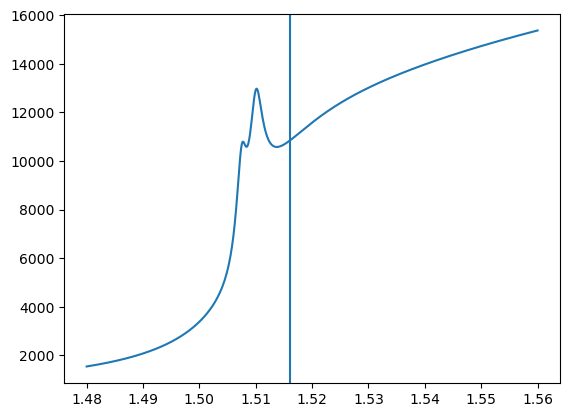

In [73]:
import matplotlib.pyplot as plt
C = 1
R = .004
E0 = 2.104
Gc = .005
G1 = .004
#GaAs Continuum model after Goni, Cantarero, Syassen, and Cardona
import numpy as np 

def u(E,E0,Gc,R,pm):
    return np.pi*np.sqrt((R/2))*np.sqrt(
       (np.sqrt((E-E0)**2+Gc**2)+(-1)**pm*(E-E0))/
       ((E-E0)**2+Gc**2)
    )
def I(E,Em,Gm,R,m,C,Gc):
    return C*np.sqrt(R)/E*(2*R*Gm/((E-Em)**2+Gm**2)/m**3-R/m**3*Gc/((E-Em)**2+Gc**2))
def II(E,E0,Gc,R,C):
    return C*np.sqrt(R)/E/2*(np.pi/2-np.arctan(-(E-E0)/Gc)) 
def III(E,up,um,C,R):
    return C*np.sqrt(R)/E*( np.pi/2*np.sinh(2*up)/(np.cosh(2*up)-np.cos(2*um)))  
def Em(E0,R,m):
    return E0-R/m**2
def Gm(Gc,G1,m):
    return Gc-(Gc-G1)/m**2
def alpha(E,E0,Gc,G1,R,C):
    up = u(E,E0,Gc,R,2)
    um = u(E,E0,Gc,R,1)
    p1 = 0
    p2 = 0 
    p3 = 0 
    for i in range(1,4):
        Ei = Em(E0,R,i)
        Gi = Gm(Gc,G1,i)
        p1 = p1+I(E,Ei,Gi,R,i,C,Gc)
        p2 = p2+II(E,E0,Gc,R,C)
        p3 = p3+III(E,up,um,C,R)
    return (p1+p2+p3)
def calpha(x,Elh,Ehh,Gclh,Gchh,G1lh,G1hh,Rlh,Rhh,Clh,Chh):
    E = np.asarray(x)
    return  alpha(E,Elh,Gclh,G1lh,Rlh,Clh)+alpha(E,Ehh,Gchh,G1hh,Rhh,Chh)
E = np.linspace(1.48,1.56,1000)
y = u(E,E0,Gc,R,0)
a = alpha(E,E0,Gc,G1,R,C)
Clh = 2.7e4
Rlh = .0035
Elh = 1.5135
Gclh = .01
G1lh = .0015
Chh = .9e4
Rhh = .0035
Ehh = 1.511
Gchh = .001
G1hh = .0015
ac = calpha(E,Elh,Ehh,Gclh,Gchh,G1lh,G1hh,Rlh,Rhh,Clh,Chh)
m =1
E1 = E0-R/1**3 
p1 = I(E,E1,G1,R,1,C,Gc)
p2 = II(E,E0,Gc,R,C)
up = u(E,E0,Gc,R,0)
um =u(E,E0,Gc,R,1)
p3 = III(E,up,um,C,R)
#plt.plot(E,y)
#plt.plot(E,p1)
#plt.plot(E,p2)
#plt.plot(E,p3)
#plt.plot(E,a)
plt.plot(E,ac)
plt.axvline(1.516)
#plt.xlim(2.07,2.17)

In [75]:
#ev to nm conversion
from scipy import constants as c 
E = c.h*c.c/1.0003/c.electron_volt

In [76]:
E

1.239470143289016e-06

In [1]:
import numpy as np
print(1.001+1.4j)
print(np.conj(1.001+1.4j))

(1.001+1.4j)
(1.001-1.4j)


In [5]:
import scipy.constants as c 
c.h

6.62607015e-34

In [24]:
import numpy as np 
a = np.asarray([1,0])
b = np.asarray([1,0])
a.dot(b)

1

In [3]:
%matplotlib widget

8.516848544622436


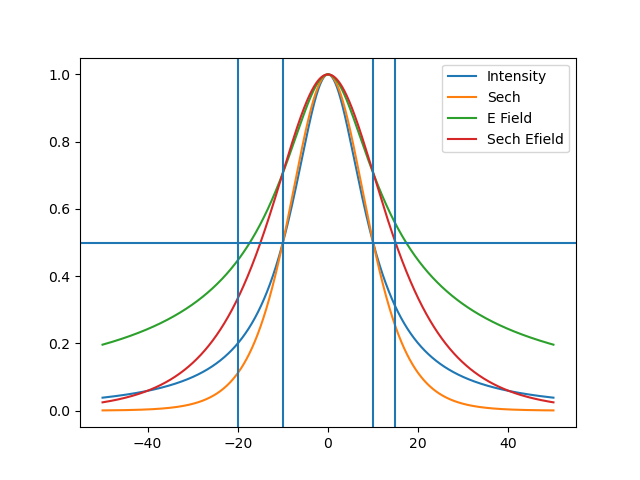

In [52]:
import numpy as np 
import matplotlib.pyplot as plt 
x = np.linspace(-50,50,5000)
gamma =10
X= gamma*2/(1.76)
Is = 1/np.cosh(x/X)**2
I = 1/(1+(x/gamma)**2)
E = np.sqrt(I)
Es= np.sqrt(Is)
fig,ax = plt.subplots()
ax.plot(x,I,label = 'Intensity')
ax.plot(x,Is,label = r'Sech')
ax.plot(x,E,label = 'E Field')
ax.plot(x,Es,label = r'Sech Efield')
ax.axvline(gamma)
ax.axvline(-gamma)
ax.axvline(gamma*2.634/1.76)
ax.axvline(-gamma*2)
ax.axhline(.5)
ax.legend()
print(np.sqrt(np.mean(x**2*I)))


In [33]:
x= np.sqrt(3)*gamma
I = (1/(1+(x/gamma)**2))**.5
print(I)

0.5


In [49]:
(2*np.log(2+np.sqrt(3)))/2

1.3169578969248166